In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Expanded_data_with_more_features.csv')

In [3]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
def check_df(dataframe,head=5):
    print('########## head ########')
    print(dataframe.head(head))
    print('######### shape ########')
    print(dataframe.shape)
    print('######### describe #######')
    print(dataframe.describe().T)
    print('############ isnull ########')
    print(dataframe.isnull().sum().sum())
    print('########### ndim ##########')
    print(dataframe.ndim)
    print('############ tail ##########')
    print(dataframe.tail(head))
    
check_df(df)

########## head ########
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  M

In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
def missing_values_df(dataframe):
    missing=[col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    sorts_v=dataframe[missing].isnull().sum().sort_values(ascending=True)
    ratio=(dataframe[missing].isnull().sum() * 100 / len(dataframe))
    concat=pd.concat([sorts_v, np.round(ratio,2)], axis=1, keys=['missing_values','ratio'])
    print(concat)

In [8]:
missing_values_df(df)

                     missing_values  ratio
PracticeSport                   631   2.06
IsFirstChild                    904   2.95
WklyStudyHours                  955   3.12
ParentMaritalStatus            1190   3.88
NrSiblings                     1572   5.13
TestPrep                       1830   5.97
EthnicGroup                    1840   6.01
ParentEduc                     1845   6.02
TransportMeans                 3134  10.23


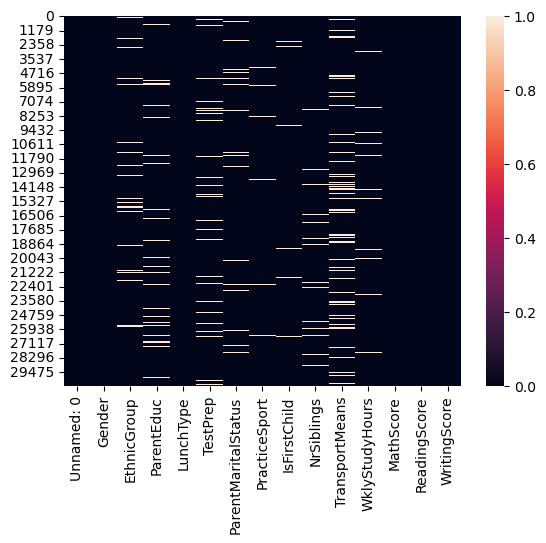

In [9]:
sns.heatmap(df.isnull());

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
def grab_col_name(dataframe, cat_th=5, car_th=10):
    
    # Category
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=='O']
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes !='O']
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes=='O']
    cat_cols=cat_cols+num_but_cat        
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
 # Number
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes !='O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f'Gozlem sayisi {dataframe.shape[0]}')
    print(f'Deyisken sayisi {dataframe.shape[1]}')
    print(f'categorik deyiskenler {len(cat_cols)}')
    print(f'number but categorik {len(num_but_cat)}')
    print(f'cardinal {len(cat_but_car)}')
    print(f'number {len(num_cols)}')
    
    return cat_cols, num_but_cat, cat_but_car ,num_cols   

In [13]:
cat_cols, num_but_cat, cat_but_car ,num_cols=grab_col_name(df)

Gozlem sayisi 30641
Deyisken sayisi 14
categorik deyiskenler 10
number but categorik 0
cardinal 0
number 4


In [14]:
cat_cols

['Gender',
 'EthnicGroup',
 'ParentEduc',
 'LunchType',
 'TestPrep',
 'ParentMaritalStatus',
 'PracticeSport',
 'IsFirstChild',
 'TransportMeans',
 'WklyStudyHours']

In [15]:
num_cols

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

In [16]:
def category_c(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Cat': 100*dataframe[col_name].value_counts()/ len(dataframe)}))
    print('######################################')

In [17]:
for col in cat_cols:
    category_c(df,col)

        Gender        Cat
Gender                   
female   15424  50.337783
male     15217  49.662217
######################################
             EthnicGroup        Cat
EthnicGroup                        
group C             9212  30.064293
group D             7503  24.486799
group B             5826  19.013740
group E             4041  13.188212
group A             2219   7.241931
######################################
                    ParentEduc        Cat
ParentEduc                               
some college              6633  21.647466
high school               5687  18.560099
associate's degree        5550  18.112986
some high school          5517  18.005287
bachelor's degree         3386  11.050553
master's degree           2023   6.602265
######################################
              LunchType        Cat
LunchType                         
standard          19905  64.961979
free/reduced      10736  35.038021
######################################
           T

In [18]:
for col in num_cols:
    category_c(df,col)

            NrSiblings        Cat
NrSiblings                       
1.0               8217  26.817010
2.0               6790  22.159851
3.0               6123  19.983029
0.0               3085  10.068209
4.0               2941   9.598251
5.0               1320   4.307953
6.0                302   0.985608
7.0                291   0.949708
######################################
           MathScore       Cat
MathScore                     
64               890  2.904605
67               814  2.656571
71               797  2.601090
70               787  2.568454
63               762  2.486864
...              ...       ...
12                 2  0.006527
14                 2  0.006527
0                  1  0.003264
8                  1  0.003264
7                  1  0.003264

[95 rows x 2 columns]
######################################
              ReadingScore       Cat
ReadingScore                        
65                    1001  3.266865
66                     826  2.695734
74      

In [19]:
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [20]:
x=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
x

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


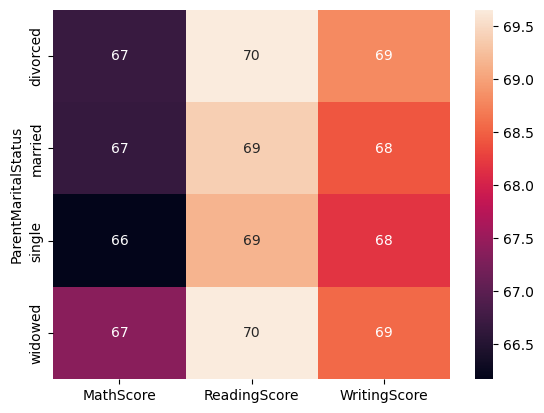

In [21]:
sns.heatmap(x, annot=True);

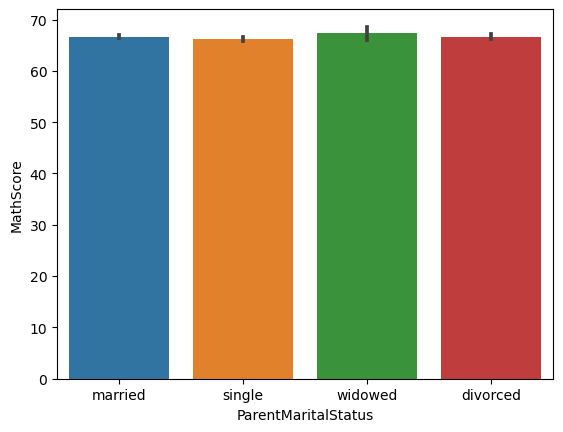

In [22]:
sns.barplot(x='ParentMaritalStatus', y='MathScore', data=df);

In [23]:
df.loc[(df['ParentMaritalStatus']=='married') & (df['Gender']=='female')]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50
12,female,group B,high school,standard,none,married,regularly,no,1.0,private,5 - 10,66,82,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,female,group D,associate's degree,standard,completed,married,sometimes,no,2.0,school_bus,NaN,67,63,72
30632,female,group D,some college,standard,none,married,regularly,no,3.0,private,5 - 10,82,88,97
30633,female,group C,master's degree,standard,completed,married,never,no,2.0,school_bus,5 - 10,84,99,99
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67


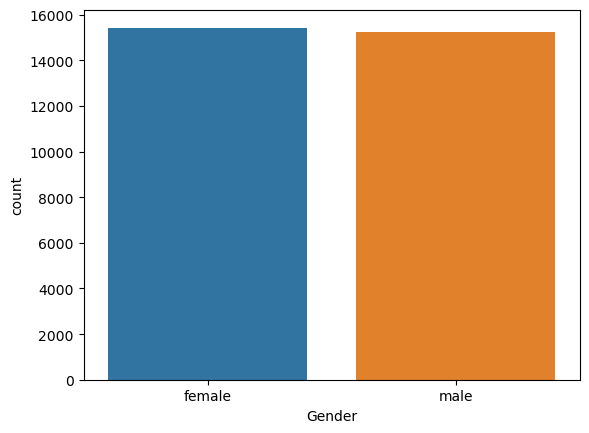

In [24]:
sns.countplot(x='Gender', data=df);

In [25]:
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [26]:
x1=df.groupby('ParentEduc').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean'})
x1

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


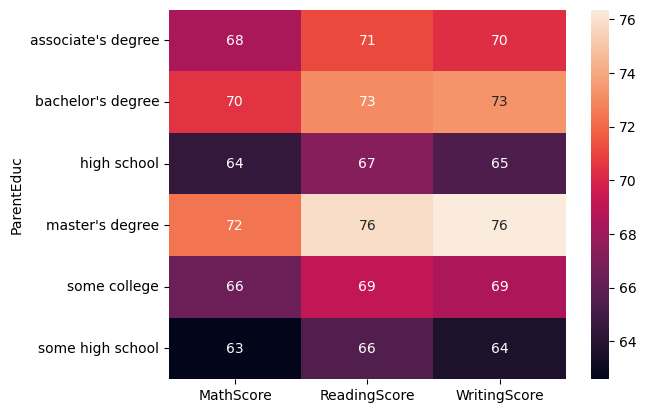

In [27]:
sns.heatmap(x1, annot=True);

In [28]:
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [49]:
df.duplicated().sum()

0

In [35]:
df.groupby('ParentEduc').agg({'Score':'mean'})

,Score
ParentEduc,
associate's degree,15338.031532
bachelor's degree,15129.831069
high school,15518.949534
master's degree,15033.816115
some college,15418.946781
some high school,15188.202465


In [30]:
Score=['MathScore','ReadingScore','WritingScore']
Score

['MathScore', 'ReadingScore', 'WritingScore']

In [31]:
df['Score']=df.index

In [32]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,1
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,2
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,3
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,30636
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,30637
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,30638
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,30639


In [33]:
df['ReadingScore'].unique()

array([ 71,  90,  93,  56,  78,  84,  43,  64,  59,  54,  52,  82,  73,
        53,  75,  89,  32,  42,  69,  76,  70,  72,  65,  87,  81,  91,
        60,  74,  55,  68,  45,  86,  41,  17,  39,  61,  58,  62,  37,
        51,  48,  25,  79,  50,  47,  38,  80,  34,  77,  46,  66,  67,
        92,  44,  88, 100,  63,  99,  83,  94,  57,  49,  36,  85,  40,
        28,  97,  23,  33,  98,  95,  31,  24,  29,  96,  35,  26,  21,
        30,  18,  15,  11,  20,  19,  16,  22,  27,  12,  10,  14],
      dtype=int64)

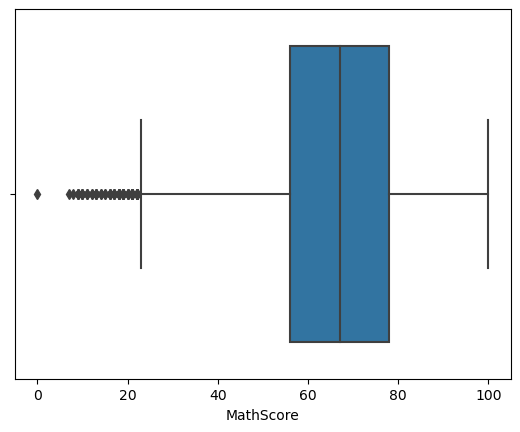

In [34]:
sns.boxplot(x='MathScore', data=df);

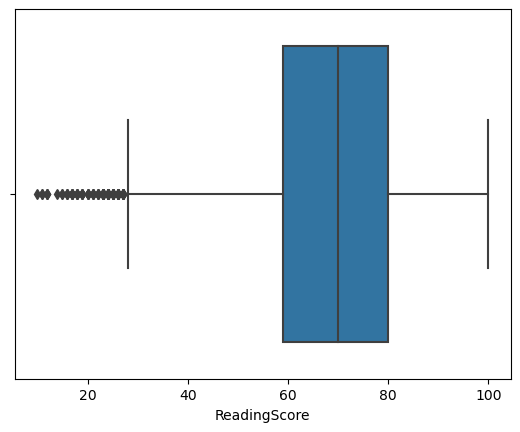

In [36]:
sns.boxplot(x='ReadingScore', data=df);

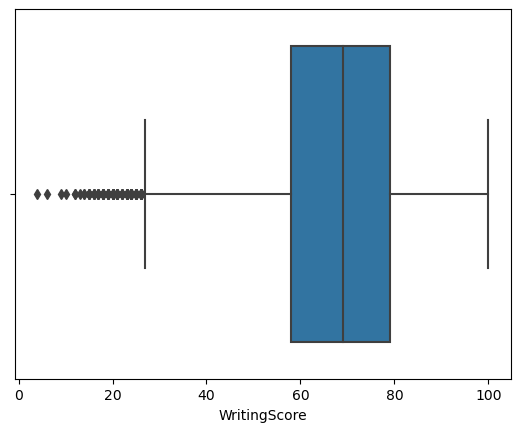

In [37]:
sns.boxplot(x='WritingScore', data=df);

In [76]:
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,1


In [79]:
df['LunchType'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [38]:
df.loc[(df['LunchType']=='standard') & (df['ParentMaritalStatus']=='single')]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,2
13,male,group A,some college,standard,completed,single,sometimes,yes,1.0,private,> 10,80,73,71,13
29,female,group D,some college,standard,none,single,sometimes,yes,0.0,private,< 5,66,72,72,29
30,female,group B,some college,standard,none,single,sometimes,yes,5.0,NaN,5 - 10,63,65,61,30
34,male,group E,associate's degree,standard,completed,single,sometimes,no,NaN,school_bus,5 - 10,81,81,79,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30603,male,group A,high school,standard,none,single,regularly,no,2.0,school_bus,5 - 10,71,63,65,30603
30621,female,group A,bachelor's degree,standard,none,single,regularly,no,2.0,private,5 - 10,66,80,78,30621
30624,female,group B,bachelor's degree,standard,completed,single,regularly,no,1.0,private,5 - 10,41,66,65,30624
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,30636


In [39]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [40]:
x2=df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
x2

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.695723,68.438233,66.999240
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


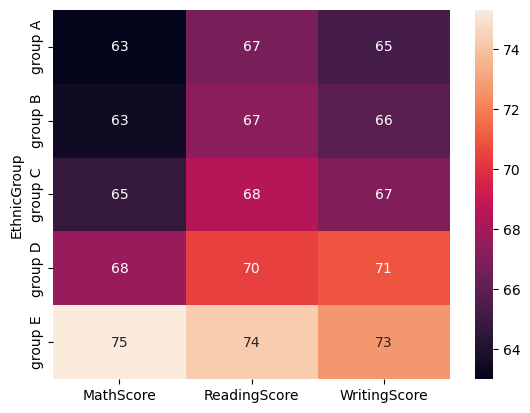

In [89]:
sns.heatmap(x2, annot=True);

In [41]:
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [44]:
group_A=df.loc[(df['EthnicGroup']=='group A')].count()
group_B=df.loc[(df['EthnicGroup']=='group B')].count()
group_C=df.loc[(df['EthnicGroup']=='group C')].count()
group_D=df.loc[(df['EthnicGroup']=='group D')].count()
group_E=df.loc[(df['EthnicGroup']=='group E')].count()

In [45]:
l=['group A', 'group B', 'group C','group D', 'group E','groupF']

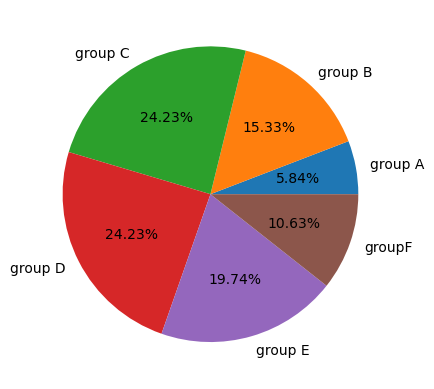

In [46]:
new_graph=[group_A['EthnicGroup'], group_B['EthnicGroup'], group_C['EthnicGroup'], group_C['EthnicGroup'], group_D['EthnicGroup'], group_E['EthnicGroup']]

plt.pie(new_graph,labels=l ,autopct='%1.2f%%');